# CS541: Applied Machine Learning, Spring 2025, Problem Set 1

### _Note: Do not delete or add blocks, do not change the function signiture (i.e., function name or arguments). If you do this the autograder won't run properly and you might get a 0._

Problem set 1 is due in Gradescope on **February 11 at 11:59pm**.
All the questions are in this jupyter notebook file. There are four questions in this assignment, each of which could have multiple parts and consists of a mix of coding and short answer questions. This assignment is worth a total of **100 points** (**60 pts** autograder, and **40 pts** remainder).  Note that each individual pset contributes the same amount to the final grade regardless of the number of points it is worth.

After completing these questions you will need to covert this notebook into a .py file named **ps1.py** and a pdf file named **ps1.pdf** in order to submit it (details below).

**Submission instructions:** please upload your completed solution files to Gradescope by the due date. **Make sure you have run all code cells and rendered all markdown/Latex without any errors.**

There will be two separate submission links for the assignment:
1. Submit **ps1.py** to `PS1-Code`
2. Submit a single `.pdf` report that contains your work for all written questions to `PS1`. You can type your responses in LaTeX, or any other word processing software.  You can also hand write them on a tablet, or scan in hand-written answers. If you hand-write, please make sure they are neat and legible. If you are scanning, make sure that the scans are legible. Lastly, convert your work into a `PDF`. You can use Jupyter Notebook to convert the formats:
  + Convert to PDF file: Go to File->Download as->PDF
  + Convert py file: Go to File->Download as->py\
You can take a look at an example [here](https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/convert_py.gif)

  Your written responses in the PDF report should be self-contained. It should include all the output you want us to look at. You will not receive credit for any results you have obtained, but failed to include directly in the PDF report file.  Please tag the reponses in your PDF with the Gradescope questions outline  as described in [Submitting an Assignment](https://youtu.be/u-pK4GzpId0).

**Assignment Setup**

You are strongly encouraged to use [Google Colab](https://colab.research.google.com/) for this assignment.

If you would prefer to setup your code locally on your own machine, you will need [Jupyter Notebook](https://jupyter.org/install#jupyter-notebook) or [JupyterLab](https://jupyter.org/install#jupyterlab) installation. One way to set it up is to install “Anaconda” distribution, which has Python (you should install python version >= 3.9 as this notebook is tested with python 3.9), several libraries including the Jupyter Notebook that we will use in class. It is available for Windows, Linux, and Mac OS X [here](https://docs.conda.io/en/latest/miniconda.html).

If you are not familiar with Jupyter Notebook, you can follow [this blog](https://realpython.com/jupyter-notebook-introduction/) for an introduction.  After developing your code using Jupyter, you are encouraged to test it on Google Colab to ensure it works in both settings.


You cannot use packages other than the ones already imported in this assignment.

**Jupyter Tip 1**: To run a cell, press `Shift+Enter` or click on "play" button above. To edit any code or text cell [double] click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.



**Jupyter Tip 2**: Use shortcut "Shift + Tab" to show the documentation of a function in Jupyter Notebook/ Jupterlab. Press Shift then double Tab (i.e., press Tab twice) to show the full documentation.\
For example, type `sum(` then Shift + Tab to show the documentation for the function, as shown in this the picture below.

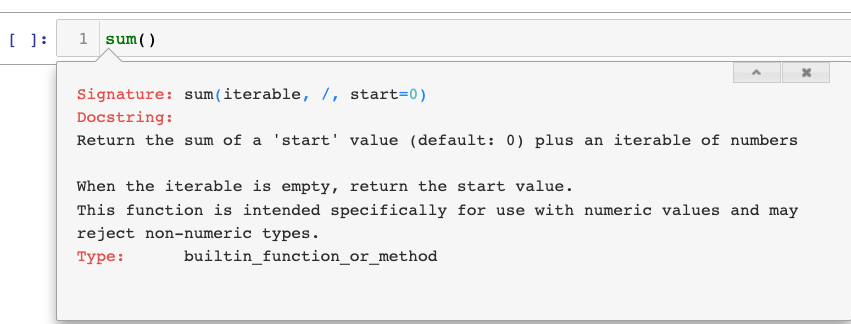

In [1]:
from IPython import display
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/jupyter_show_document.png")


In [2]:
## you can try it here

# **Question 1.** Using Numpy to manipulate data (*10 total points*)

You learned about [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html#installing-numpy) in Lab 1. Numpy supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.

When implementing machine learning models, you will often find yourself having to perform complicated operations on arrays of data.

For example, say you are training a model to predict words of a story you wrote. Each word is represented by a class number in your data. Hence, predicting the right word becomes a classification problem at each step- the model needs to precict the correct word class out of the posible classes for all words. Let's go through what we need to do to prepare such data and you will see how often you will need numpy operations to format the data.  


## **1.0. Code**: Converting classes to one-hot vectors *(3 pts)*


Let's start with a one line story: "a cat jumps over a fence"

Let's assume you have an array that has translated this sentence to a number for each word:

`[0, 10, 34, 87, 0, 55]` - So, for example, "cat" is 10.

Imagine you have $100$ words in your total vocabulary - of which, we are only using six words here in the one sentence.

Recall, that in classification, a model predicts a vector of total class size. For example, if you have only 10 classes, the output of the model would be something like:

`[0.05, 0.02, 0.03, 0.4, 0.2, 0.1, 0.05, 0.05, 0.01, 0.09]`

The predicted class is the `argmax` of the output vector - the position of the max score. Hence, the class predicted by the model above is `3` since the third index (index starts from 0) has the highest value.

Now, to train the model, you may often have to convert your class numbers to a format above where you have a `1` for the position of the correct class and `0` elsewhere.
So, if the correct class for the above example was indeed `3`, the training data would have looked like:

`[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`

This is called a 1-hot representation.
Your first task is to convert your data  - a list of numbers depicting the word class in your sentence - into an array where each row is a one-hot representation of the word class in the sentence. So, for the sentence gives, you will have 6 rows for each of the 6 words in sequence.

In [3]:
# First, we need to import numpy, and name it as np for brevity.
# This is a widely adopted convention that you should follow so that people can easily understand it.
import numpy as np

sentence = [0, 10, 34, 87, 0, 55]

Now, write a function below that takes the sentence vector as an input and outputs a 1-hot representation. Each row should have a 1 at the correct position where the position indcated the word class.
DO NOT use for-loops in your code. In the real world when training large models, you will have billions of such words, and hence using for-loops will be impractical.

In [4]:
def question_1(sentence):
    """
    DO NOT change the name of the function.
    given a sentence vector, convert to one-hot.
    """
    # Write your code in this block -----------------------------------------------------------
    one_hot = np.zeros((len(sentence), 100))
    one_hot[np.arange(len(sentence)), sentence] = 1

    # End of your code ------------------------------------------------------------------------
    return one_hot


# test your function, using the example.
# We will test your function with more test cases when grading
one_hot = question_1(sentence)
print(one_hot.shape)

(6, 100)


## **1.1 Code:** Padding to create a batch *(7 pts)*

While training, one sentence may not cut it. You will usually have hundreds of such sentences in a batch.
However, each sentence will be of a variable size. You cannot create an array where each entry is of a different size in numpy. Hence, a common way to get around this is to pad shorter sentences to make them all the same size. Let's say we use introduce a new class number of `100` to represent pad (recall that you have 100 actual words `0-99`).


Your job is to now create a padded representation given multiple sentences of variable lengths.

You CANNOT use for-loops for the exercise. In the real world when training large models, you will have billions of such words, and hence using for-loops will be impractical.

Feel free to use the function you defined above if it helps.

In [5]:
import numpy as np

def question_2(arr: np.ndarray) -> np.ndarray:
    """
        Given a list of padded entries with pad class 100.
    """
    # Write your code in this block -----------------------------------------------------------


    #First identify the shape

    rows,columns=arr.shape

    array=np.zeros((rows,columns,101))
    array[np.arange(rows)[:, None], np.arange(columns)[None, :], arr] = 1

    # End of your code ------------------------------------------------------------------------
    return array


## test your function using an example
## note that `sentences` is an example for the test case. We will test your function with more test cases.

sentences = [
    [1, 0, 21, 9, 0, 77, 98, 100, 100],
    [3, 58, 21, 98, 0, 77, 100, 100, 100],
    [2, 4, 21, 95, 1, 77, 98, 10, 100],
    [83, 45, 2, 9, 3, 77, 98, 11, 12],
    [33, 45, 1, 9, 4, 77, 8, 100, 100],
    [73, 45, 17, 9, 100, 100, 100, 100, 100],
    [13, 45, 22, 9, 60, 77, 58, 78, 77],
]

padded_out = question_2(np.array(sentences))

print("padded output:\n", padded_out)

padded output:
 [[[0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 

# **Question 2**. Data splitting (*10 total points*)

Now that you have learned how to format data, we will need to desice which part of the data to train with and which part ot test with.

Above, we were working with a toy dataset.

First, we will download a real-world dataset.

The data is about flowers. Imagine we need to detect a flower category based on attributes like petal width, size, etc.  

## 2.0. Download Data

First, you need to follow the tutorial [here](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) to get used to Pandas, such as how to select some subset of table, how to derive a new column from existing ones.

Then, you will need to complete the questions at the end of this sections.


In this problem set, we mostly work with Iris dataset.\
The dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

In [6]:
import pandas as pd
import random
import numpy as np

## path to the csv file, we can read from an url or a local file on the machine
iris_path = "https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/iris.csv"

## read the iris dataset as a dataframe
df = pd.read_csv(iris_path)

## print the random 5 rows of the dataframe
df.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
45,4.8,3.0,1.4,0.3,Setosa
143,6.8,3.2,5.9,2.3,Virginica
82,5.8,2.7,3.9,1.2,Versicolor
68,6.2,2.2,4.5,1.5,Versicolor
71,6.1,2.8,4.0,1.3,Versicolor


## 2.1. **Code:** Create class labels (2 pts)

Given the Iris dataset above, map the names in "variety" to class labels. Map "Virginica" to 0, "Versicolor" to 1, and "Setosa" to 2.

The input to the model will be the four attributes - sepal.length, sepal.width, petal.length, petal.width. The output of the model will be the corresponding class label.

Hence, you should create a 2-D array for the input that has the 4 attribute values in each row - let's call this `X`. Similarly, you should create a 1-D array with the class labels for each row in the input - let's call this `y`.

In [7]:
def question_3(data):
    # Write your code in this block ----------------------------------------------------------
    X = data[:, :-1]
    y = data[:, -1]
    label_mapping = {'Setosa': 2, 'Versicolor': 1, 'Virginica': 0}
    y = np.vectorize(label_mapping.get)(y)


    # End of your code ------------------------------------------------------------------------
    return X, y

data = df.to_numpy()
np.random.shuffle(data)
# this is list like:
#[[5.3 3.7 1.5 0.2 'Setosa']
# [5.0 3.3 1.4 0.2 'Setosa']
# [7.0 3.2 4.7 1.4 'Versicolor']
# [6.4 3.2 4.5 1.5 'Versicolor']]

# you need to convert the last column to the class labels - 0,1,2 and create X and y. X should have the first 4 columns and y should have the labels.

X, y = question_3(data)

## 2.2 **Code:** Split into train and test (3pts)

A common practice is to split the data into 3 parts - training, validation, and test.

Training set is used to train the model - no surprises here.
Validation set is used to choose the hyperparameters like the learning rate. So, you can try various learning rates and check which one performs best on the validation set.

Finally, to report the performance, we will test the best performing model on the validation set on the test set.

However, for simplicity, we will just be using train and test here since there aren't many hyperparameters to tune.
Let's use 80% of the data to train, 20% to test.

Hence, we need the following arrays from the `X` and `y` you just created:
    
- Training set (80%):
    - `X_train`: training attributes
    - `y_train`: training labels
- Testing set (20%):
    - `X_test`: test attributes
    - `y_test`: test labels

To ensure there is an equal distribution of all labels in both the training and testing set, randomly choose $80\%$ of the "Setosa" entries, $80\%$ of "Virginica" entries and $80\%$ of "Versicolor" entries in `X_train` and the labels in `y_train`.
Put the rest in `X_test` and `y_test`.

In [8]:
def question_4(X, y):
    # Write your code in this block -----------------------------------------------------------
    # format the downloaded csv data file to output the 4 arrays- X_train, y_train, X_test, y_test
    np.random.seed(42)
    X_train = []
    y_train = []
    X_test = []
    y_test = []

    classes = np.unique(y)

    for label in classes:
        classes_indices = np.where(y == label)[0]
        np.random.shuffle(classes_indices)
        split_idx = int(len(classes_indices) * 0.8)

        train_indices = classes_indices[:split_idx]
        test_indices = classes_indices[split_idx:]

        X_train.append(X[train_indices])
        y_train.append(y[train_indices])
        X_test.append(X[test_indices])
        y_test.append(y[test_indices])

    X_train = np.vstack(X_train)
    y_train = np.hstack(y_train)
    X_test = np.vstack(X_test)
    y_test = np.hstack(y_test)

    # End of your code ------------------------------------------------------------------------
    return X_train, y_train, X_test, y_test

# Test your function
X_train, y_train, X_test, y_test = question_4(X, y)

## 2.3 **Code:** Training Bias (5 pts)

An important theme in machine learning is the effect of training bias on testing. To illustrate this, let's create a split where the training set is biased towards a label and the test is biased to another.

This time, instead of randomly splitting the `X` and `y`, randomly choose $95\%$ of the "Setosa" entries, $20\%$ of "Virginica" entries and $50\%$ of "Versicolor" entries in `X_train_biased` and the labels in `y_train_biased`.

Put the rest in the `X_test_biased` and `y_test_biased`.

In [9]:
def question_5(X, y):
    # Write your code in this block -----------------------------------------------------------
    # format the downloaded csv data file to output the 4 arrays- X_train, y_train, X_test, y_test

    # np.random.seed(42)
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    split_ratios = {2: 0.95, 1: 0.50, 0: 0.20} # Virginica: 0, Versicolor: 1, Setosa: 2

    for label, ratio in split_ratios.items():
        classes_indices = np.where(y == label)[0]
        np.random.shuffle(classes_indices)
        split_idx = int(len(classes_indices) * ratio)

        train_indices = classes_indices[:split_idx]
        test_indices = classes_indices[split_idx:]

        X_train.append(X[train_indices])
        y_train.append(y[train_indices])
        X_test.append(X[test_indices])
        y_test.append(y[test_indices])

    X_train = np.vstack(X_train)
    y_train = np.hstack(y_train)
    X_test = np.vstack(X_test)
    y_test = np.hstack(y_test)

    # End of your code ------------------------------------------------------------------------
    return X_train, y_train, X_test, y_test

# Test your function
X_train_biased, y_train_biased, X_test_biased, y_test_biased = question_5(X, y)

##2.4 Understand the below code



In [10]:
import pandas as pd

def question_5_part2(X, y):


    X,y=pd.DataFrame(X),pd.Series(y)
    X.reset_index(drop=True,inplace=True)
    y.reset_index(drop=True,inplace=True)

    df=pd.DataFrame(pd.concat([X,y],axis=1))
    df_=df.copy()
    values=df.iloc[:,:-1].quantile(0.5,axis=0)
    df=df.iloc[:,:-1][(df.iloc[:,:-1] >= pd.Series(values)).all(axis=1)]
    df["label"]=y[df.index]

    indicesTrain=[x for x in list(range(X.shape[0])) if x not in df.index]

    X_train=X.iloc[indicesTrain]
    y_train=y[indicesTrain]
    X_test=df.iloc[:,:-1]
    y_test=df.iloc[:,-1]
    return X_train, y_train, X_test, y_test

# Test your function
X_train, y_train, X_test, y_test = question_5_part2(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(110, 4) (110,) (40, 4) (40,)


1. Explain whats happening in the above code.
2. What could go wrong if we train a model with the above code ?
3. How to prevent it from happening ?

## **1. Explanation of the Code**
The function `question_5_part2(X, y)` processes the Iris dataset as follows:

- Converts X and y into a Pandas DataFrame and Series.
- Computes the *median* for each feature.
- Filters rows where all feature values are *greater than or equal to* their respective median values.
- Selects only those rows where *all feature values* are *greater than or equal to their respective median values* to form the test set.
- The remaining samples (those with at least one feature value below the median) form the training set.

The function *returns* the split data: X_train, y_train, X_test, and y_test.

---

## **2. What Could Go Wrong if We Train a Model with This Code?**
Below are some potential issues:

### **a) Training-Test Data Leakage**
- The median values are computed from the entire dataset, meaning the test set carries statistical information from the training set.
- This can lead to *overfitting*.

### **b) Imbalanced Data Splitting**
- The method filters out lower-valued feature samples, meaning the split is *not random*.

---

## **3. How to Prevent These Issues?**
Below are some ways to mitigate these issues:

### **a) Avoid Data Leakage**
- Compute statistics *only on the training set* before applying them to test data.

### **b) Use Random Sampling for Data Splitting**
- Instead of filtering based on feature values, use a *random split* to ensure all classes are proportionally represented.

# **Question 3.** Using Scikit-learn to learn a classifier (*35 total points*)

[scikit-learn](https://scikit-learn.org/stable/getting_started.html) (also known as `sklearn`) is a useful tool for model fitting, data preprecessing, model evaluation and many other utilities. It provides many built-in machine learning algorithms. If you haven't had the package: `pip install -U scikit-learn --user`

## 3.0. Brief Tutorial

You should take a look at [this tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html) to get an overview of Sklearn. After that, you will use Sklearn to train a KNN model. Following is the code to set up the dataset for the model.

In [11]:
from sklearn import metrics, model_selection, preprocessing, neighbors
from sklearn.model_selection import train_test_split

## Check on the shape of training and test sets that you created above.
print(X_train.shape, X_test.shape)
print(X_train_biased.shape, X_test_biased.shape)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


(110, 4) (40, 4)
(82, 4) (68, 4)


In [12]:
# Check total dataset size matches
print(f"Total Samples: {X.shape[0]}")
print(f"Standard Split: Train {X_train.shape[0]}, Test {X_test.shape[0]} -> Total: {X_train.shape[0] + X_test.shape[0]}")
print(f"Biased Split: Train {X_train_biased.shape[0]}, Test {X_test_biased.shape[0]} -> Total: {X_train_biased.shape[0] + X_test_biased.shape[0]}")

# Check if class distributions are correct
print("\nClass Distribution in Standard Split:")
print("y_train:", np.unique(y_train, return_counts=True))
print("y_test:", np.unique(y_test, return_counts=True))

print("\nClass Distribution in Biased Split:")
print("y_train_biased:", np.unique(y_train_biased, return_counts=True))
print("y_test_biased:", np.unique(y_test_biased, return_counts=True))


Total Samples: 150
Standard Split: Train 110, Test 40 -> Total: 150
Biased Split: Train 82, Test 68 -> Total: 150

Class Distribution in Standard Split:
y_train: (array([0, 1, 2]), array([21, 39, 50]))
y_test: (array([0, 1]), array([29, 11]))

Class Distribution in Biased Split:
y_train_biased: (array([0, 1, 2]), array([10, 25, 47]))
y_test_biased: (array([0, 1, 2]), array([40, 25,  3]))


In [13]:
## Standardize the features
sc = preprocessing.StandardScaler()
sc.fit(X_train)  # use X_train to compute descriptive statistics like mean, std

X_train = sc.transform(X_train)  # Standardize the training set
X_test = sc.transform(X_test) # Standardize the test set

sc = preprocessing.StandardScaler()
sc.fit(X_train_biased)  # use X_train to compute descriptive statistics like mean, std

X_train_biased = sc.transform(X_train_biased)  # Standardize the training set
X_test_biased = sc.transform(X_test_biased) # Standardize the test set

## 3.1. Code: KNN (5 pts)

Use Sklearn to train a KNN model. You may find [this](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) link helpful.

Let's train using both the randomly sampled train and the biased train sets you created above.

In [14]:
def question_6(X_train: np.array, y_train: np.array, n_neighbors: int, metric: str) -> neighbors.KNeighborsClassifier:
    """
        X_train: features
        y_train: label
        n_neighbors: number of neighbors
        metric: Metric to use for distance computation, e.g., 'cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan'
        return a trained Sklearn's KNN model
    """
    # Write your code in this block -----------------------------------------------------------
    model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    model.fit(X_train, y_train)


    # End of your code ------------------------------------------------------------------------
    return model

## Test your function
model = question_6(X_train, y_train, n_neighbors = 3, metric="euclidean")
model_biased = question_6(X_train_biased, y_train_biased, n_neighbors = 3, metric="euclidean")

## 3.2. Code: Accuracy score (5 pts)

 Compute the accuracy score of a model using both the randomly sampled train and test sets. Also, compute the accuracy when trained on the biased splits.

In [15]:
from sklearn.metrics import accuracy_score

def question_7(model: neighbors.KNeighborsClassifier, X_test: np.array, y_test: np.array) -> float:
    """
        model: Sklearn's KNN model that you have trained
        X_test: features
        y_test: label
        return accuracy score of the model on test set (i.e., X_test, y_test)
    """
    # Write your code in this block -----------------------------------------------------------
    # You can use `accuracy_score` from Sklearn.
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

    # End of your code ------------------------------------------------------------------------

## Test your function
## Your model should work well on this dataset, with an accuracy 91-97%
print("Accuracy with balanced train and test splits: ", question_7(model, X_test, y_test))

## What do you notice about performance with biased data?
print("Accuracy with biased train data: ", question_7(model_biased, X_test_biased, y_test_biased))

Accuracy with balanced train and test splits:  0.975
Accuracy with biased train data:  0.8235294117647058


Here on out, let's just use the randomly shuffled splits to the do the rest of the experiments.

## 3.3. Short answer: Parameter tuning (5 pts)

You should try out different values for `n_neighbors` and `metric` for KNN model in the previous question.
For example, try `n_neighbors`=2, 3, or 4,  and `metric`='cosine' or 'euclidean'.\
Which is the best setting with the best accuracy you got on this dataset?

Write your answer in this block

**Your Answer:**

After experimenting with different values of `n_neighbors` and distance metrics, I found that *Euclidean distance consistently performed better than Cosine distance* across both balanced and biased datasets.

- For the *balanced dataset*, the best accuracy was achieved with  
  *`n_neighbors=3, metric='euclidean'`*, reaching *0.975*.
  
- For the *biased dataset*, the best accuracy was obtained with  
  *`n_neighbors=3, metric='euclidean'`*, reaching *0.823*.

This suggests that *using Euclidean distance with `n_neighbors=3` is a reasonable choice* for this dataset, even when dealing with the biased training set.

## 3.4. Code: Cross Validation (CV) (5 pts)

One way to train the model is splitting the dataset into *train*, and *test set*.

We can aslo split the data into $k$-folds as follows.
We train the model $k$ times: each time, we use 1 fold for testing, and the rest for training.\
The picture below demonstrates how k-fold cross validation works (folds in blue mean test sets).


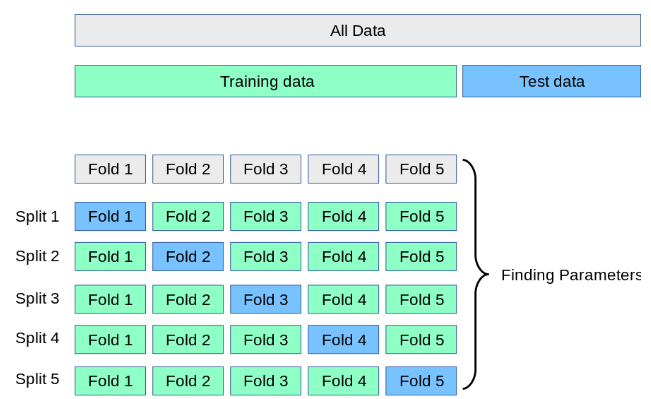

In [16]:
from IPython import display
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/kfold.png")

Write a function to compute the Cross Validation accuracy of a KNN model on Iris dataset.


In [17]:
from sklearn.model_selection import cross_val_score

def question_9(X: np.ndarray, y: np.ndarray, n_neighbors: int, k: int) -> float:
    """
        X: features, shape of (N, 4), where N is the number of samples
        y: labels, shape of (N, )
        n_neighbors: number of neighbors in KNN
        k: the number of folder in k-fold CV
    return: the average of CV accuracies on k folds. It should be a float number in [0, 1]
    """
    # Write your code in this block -----------------------------------------------------------
    #    first, initialize a KNeighborsClassifier object,
    #    then use `cross_val_score` from sklearn to compute the CV accuracy for each fold

    model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    cv_accuracy = cross_val_score(model, X, y, cv=k)
    avg_accuracy = np.mean(cv_accuracy)
    return avg_accuracy

    # End of your code ------------------------------------------------------------------------

## test your function, the result should be at least 90%
question_9(X, y, 4, 5)

0.9733333333333334

## 3.5. Non-Autograder Code: Plot (10 pts)



Plot a graph to show how `n_neighbors` affects the performance of KNN on Iris dataset.

You can use seaborn (https://seaborn.pydata.org/) or matplotlib (https://matplotlib.org/) for this question.


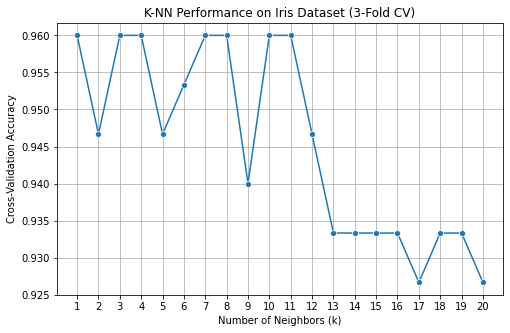

In [18]:
from typing import List
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def question_10(X: np.ndarray, y: np.ndarray, n_neighbors_list: List[int], k: int)-> None:
    """
         X: features, shape of (N, 4), where N is the number of samples
         y: labels, shape of (N, )
         n_neighbors_list: list of `n_neighbors`
         k: the number of folder in k-fold CV
    """

    # Write your code in this block -----------------------------------------------------------

    cv_accuracies = []
    for n_neighbors in n_neighbors_list:
        model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
        cv_accuracy = cross_val_score(model, X, y, cv=k)
        avg_accuracy = np.mean(cv_accuracy)
        cv_accuracies.append(avg_accuracy)

    plt.figure(figsize=(8, 5))
    sns.lineplot(x=n_neighbors_list, y=cv_accuracies, marker='o')

    # Formatting
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Cross-Validation Accuracy")
    plt.title(f"K-NN Performance on Iris Dataset ({k}-Fold CV)")
    plt.xticks(n_neighbors_list)  # Show all n_neighbors values
    plt.grid(True)
    plt.show()

    # End of your code ------------------------------------------------------------------------

    return None


## test your function. Your function should plot a similar graph as shown below.
n_neighbors_list = list(range(1,21))
k=3
question_10(X, y, n_neighbors_list, k)

## 3.6. Short answer: Learning Curve (5 pts)

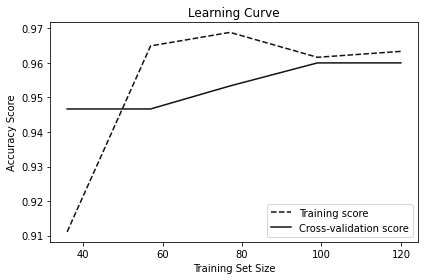

In [19]:
## Learning Curve: How training size affect CV accuracy score

def plot_learing_curve(model):
    if not getattr(model, "fit", None):
      print("'model' should be a Sklearn's model!")
      return


    # Create training and test scores for various training set sizes
    from sklearn.model_selection import learning_curve

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy',
                                                        train_sizes=np.linspace(0.3, 1.0, 5))

    # Create means of training set scores and test set scores
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.tight_layout()


## Plot the learning curve for KNN model
plot_learing_curve(model)

How training set size affect the performance of KNN model?

Write your answer in this block

**Your Answer:**

As the training set size increases, the KNN model improves in performance, with cross-validation accuracy rising as the model generalizes better. Initially, training accuracy is high while validation accuracy is lower, indicating overfitting. As more data is added, the gap between training and validation accuracy narrows, reducing overfitting and improving generalization. However, after a certain point (100 samples), both accuracies plateau, meaning additional data provides diminishing returns. 

It's also important to note that the learning curve is affected by the random split of data in cross-validation.


# **Question 4**. Using Classifiers (*total 45 points*)

## 4.1. Code: KNN using Numpy (25 points)

In this section, we re-implement KNN from scratch using numpy.\
You need to complete following methods of `KNN` class.\
Note that for this question, you are NOT allowed to use sklearn.

In [20]:
class KNN():
    """
        KNN using numpy.
        For simplicity, we only implement the class with `weights`='uniform'.
    """

    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        self.weights = "uniform"
        self.n_classes = 3  ## for Iris dataset

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        return self

    def compute_euclidean_distance(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        """
           Compute euclidean distance of each samples in A and B  (20 points)
           A: np.ndarray, shape: (num samples a, feature_dim=4)
           B: np.ndarray, shape: (num sample b, feature_dim=4)
           Return a 2-d array, shape of (a, b)
        """
        # Write your code in this block -----------------------------------------------------------
        # Using for loops is acceptable, but think how to use numpy vectorization (instead of for loops) for this function.

        return np.sqrt(np.sum((A[:, None] - B) ** 2, axis=2))
        # End of your code ------------------------------------------------------------------------

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        """
            Return a numpy array of shape (num_samples, 1) as the predictions  (20 points)
        """

        # Write your code in this block -----------------------------------------------------------
        distances = self.compute_euclidean_distance(X_test, self.X_train)  # Compute distances
        nearest_neighbors_idx = np.argsort(distances, axis=1)[:, :self.n_neighbors]  # Get k nearest neighbors
        nearest_labels = np.array(self.y_train)[nearest_neighbors_idx]  # Convert y_train to numpy array before indexing
        predictions = np.array([np.bincount(row).argmax() for row in nearest_labels])  # Find the most common label
        return predictions
        # End of your code ------------------------------------------------------------------------

    def score(self, X_test: np.ndarray, y_test: np.ndarray) -> float:
        """
            Get accuracy score on test set  (10 points)
            return: a float number in range of [0,1]
        """
        # ------------------------------------------------------------------------------------------
        # Write your code in this block
        # Note: You can NOT use "accuracy_score()" from sklearn.

        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)
        # ------------------------------------------------------------------------------------------

In [21]:
## Test our class: compare our implementation with Sklearn's. The results should be the same
n_neighbors = 3
our_classifier = KNN(n_neighbors=n_neighbors).fit(X_train, y_train)
sklearn_classifier = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)

our_acc = our_classifier.score(X_test, y_test)
sklearn_acc = sklearn_classifier.score(X_test, y_test)

pd.DataFrame([[our_acc, sklearn_acc]],
             ["Accuracy"],
             ["Our KNN", "Sklearn's KNN"])

,Our KNN,Sklearn's KNN
Accuracy,0.975,0.975


## 4.2. Short answer: Decision Tree & Random Forest (6 pts)

We can use sklearn to create a decision tree as follows

In [22]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(22)

## read Iris dataset
df = pd.read_csv(iris_path)

## Split train/test on data frame
test_size = 0.3
msk = np.random.rand(len(df)) > test_size
train = df[msk]
test = df[~msk]

## Train a Sklearn's decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train.drop(columns=["variety"]), train["variety"])
print("accuracy on test set:", decision_tree.score(test.drop(columns=["variety"]), test["variety"]))

accuracy on test set: 0.9782608695652174


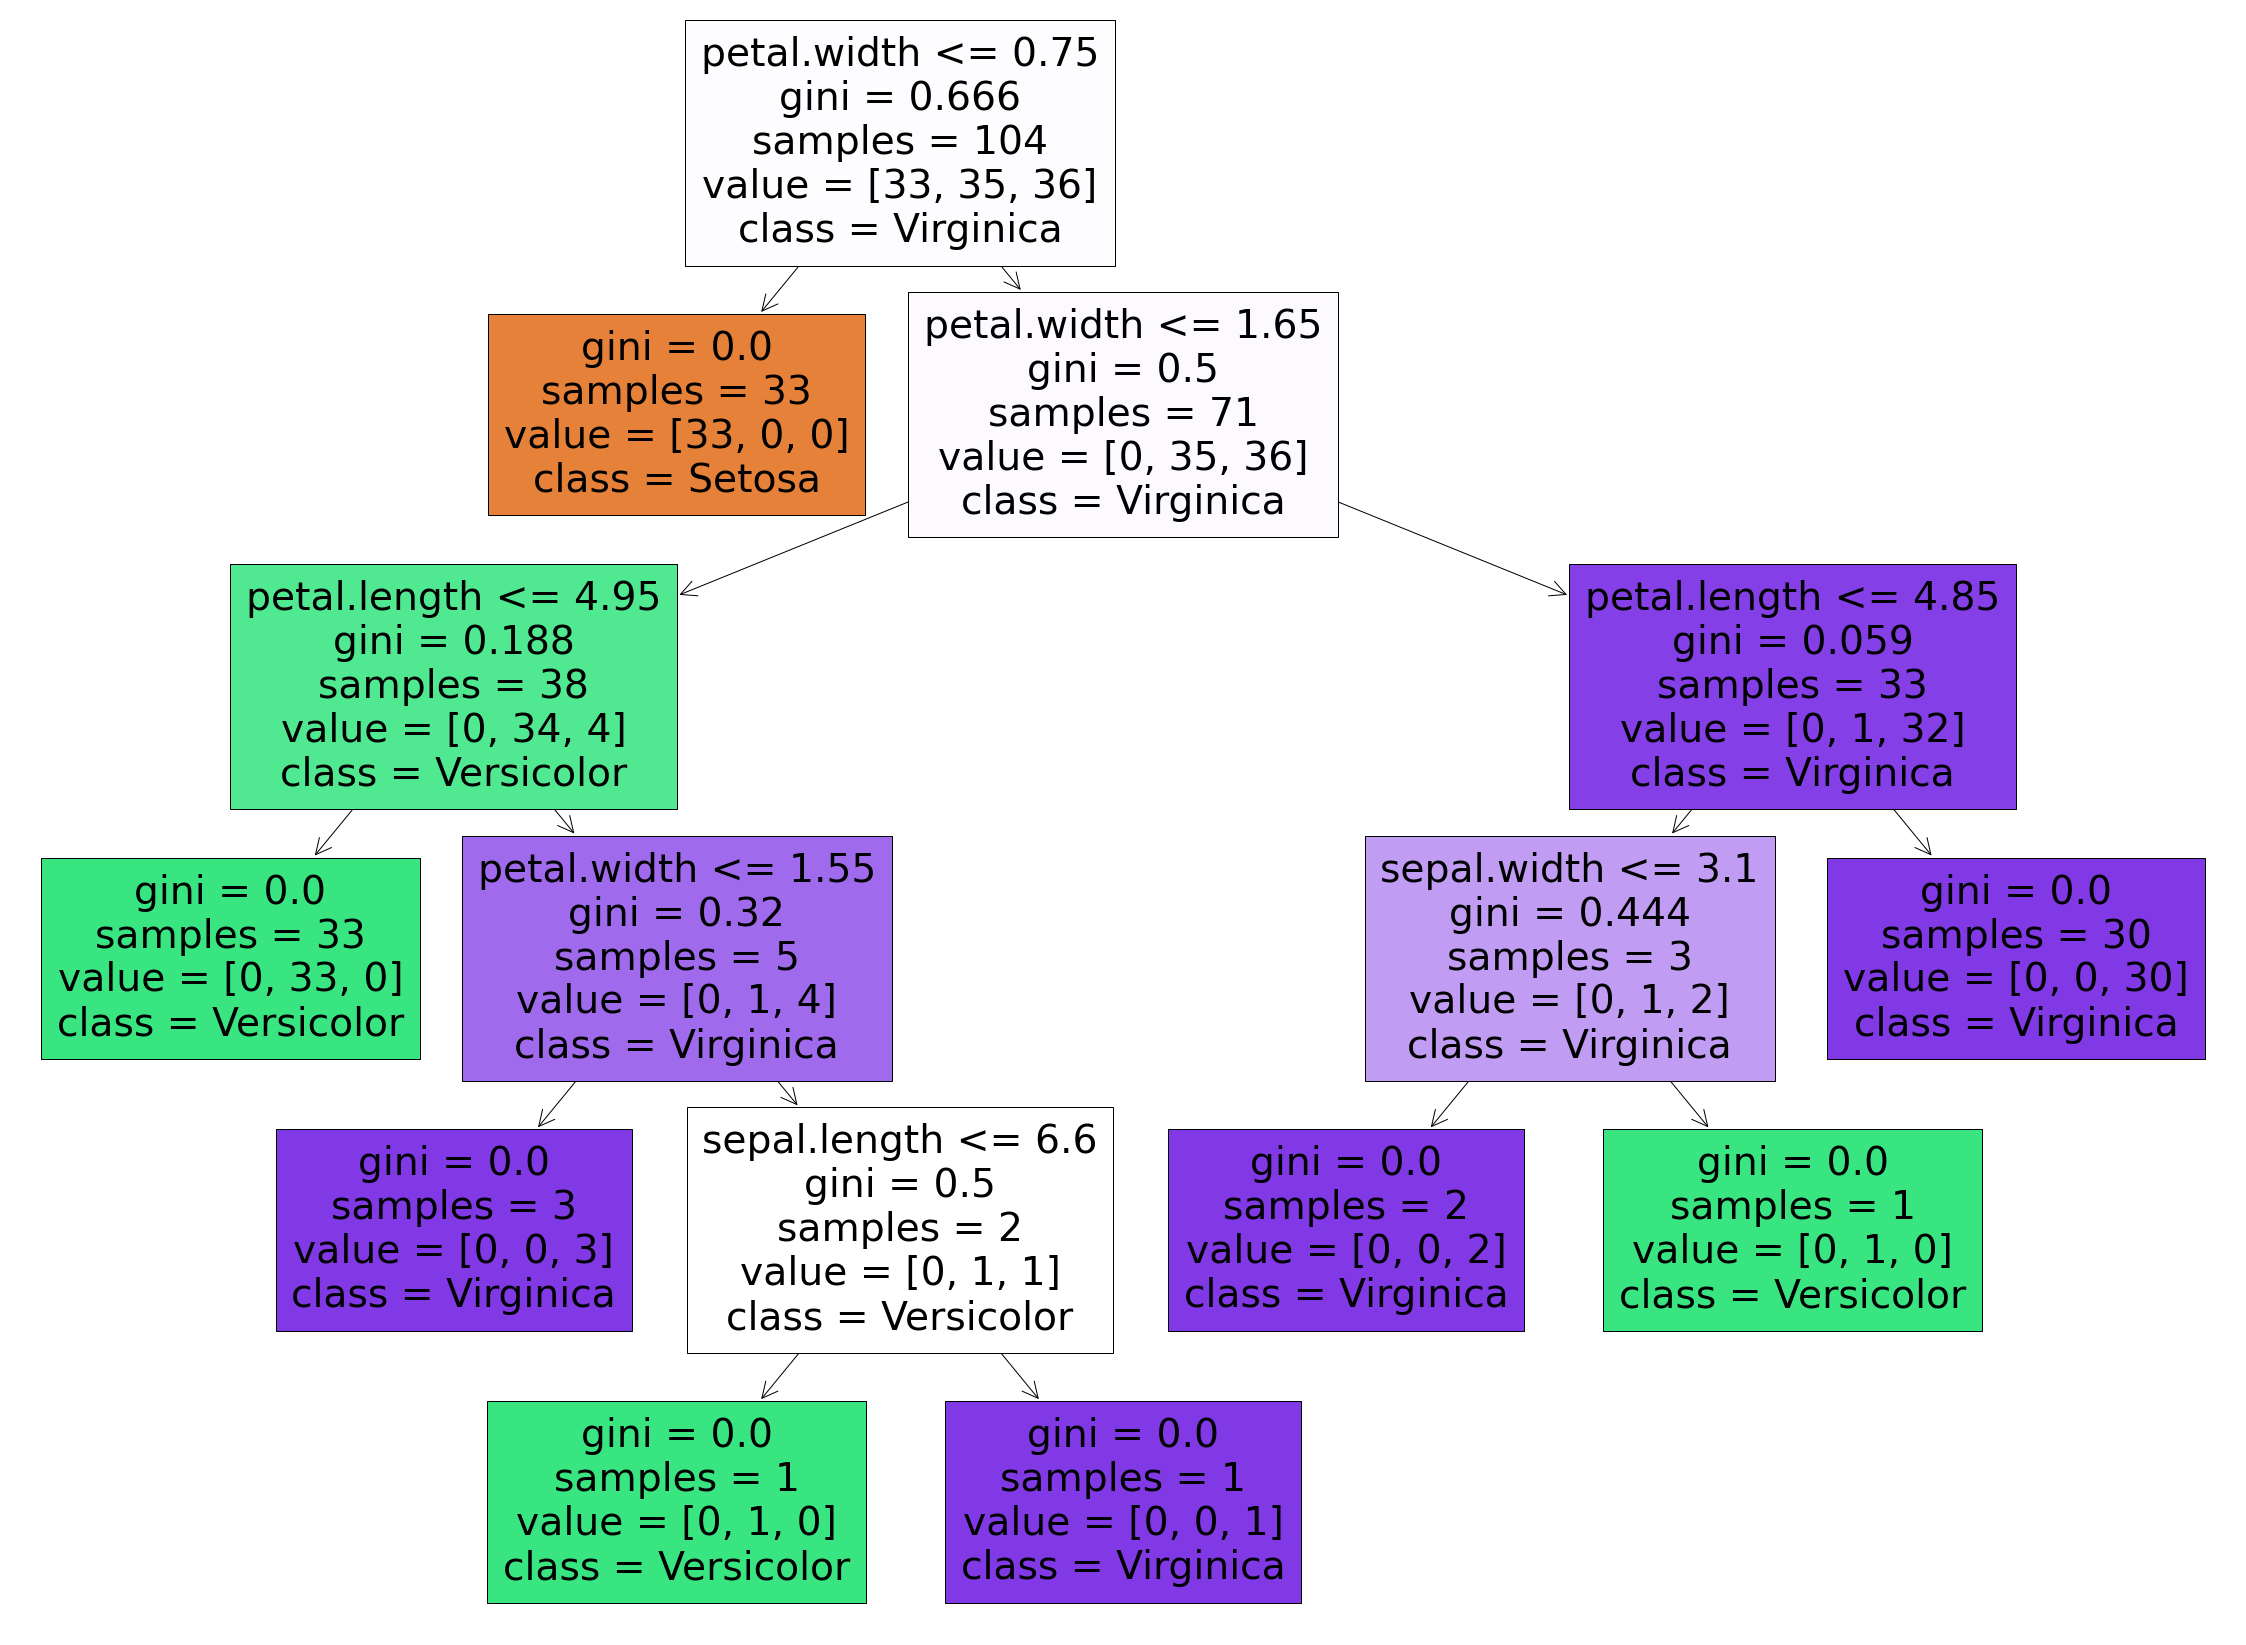

In [23]:
## Visualize the tree
from sklearn import tree

fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(decision_tree,
                   feature_names=list(df.columns[:-1]),
                   class_names=list(df.variety.unique()),
                   filled=True)

Let's say we want to make a prediction for this sample:

In [24]:
## show 1 sample
sample = test.iloc[0:1]
sample

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa


In [25]:
## Let's see what the model predicts for the sample you have seen above
decision_tree.predict(sample.drop(columns=["variety"]))

array(['Setosa'], dtype=object)

Explain how the decision tree made that prediction by pointing out the path from the root to its leaf.

Write your answer in this block

**Answer:**  

The decision tree classified this sample as *Setosa* because the root node's condition is `petal.width <= 0.75`. The sample's value is `0.2`, which is smaller than `0.75`, so we move to the *left node*, which is a leaf node. Since this node is pure and labeled as *Setosa*, the sample is classified as *Setosa*.

In [26]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(22)

## Train a Sklearn's Random Forest Classifier


randomForest = RandomForestClassifier(n_estimators=1,max_depth=1)
randomForest.fit(train.drop(columns=["variety"]), train["variety"])
print("accuracy on test set:", randomForest.score(test.drop(columns=["variety"]), test["variety"]))

accuracy on test set: 0.6956521739130435


Why is the above Random Forest Classifier performing poorly ? Elaborate the issue briefly.

Write your answer in this block

**Answer:**

The poor performance is due to the *weak model configuration*. The classifier is using *only one decision tree* with a *maximum depth of 1*, meaning each tree can make only a single split based on one feature. Essentially, this is not a *random forest*, but a single, shallow decision tree that lacks complexity.

## 4.3. Short answer: Overfitting (6 pts)

The picture below shows the decision boundary of 3 classifiers on the same dataset.
Which one is likely to overfit on the dataset? Briefly explain your answer.

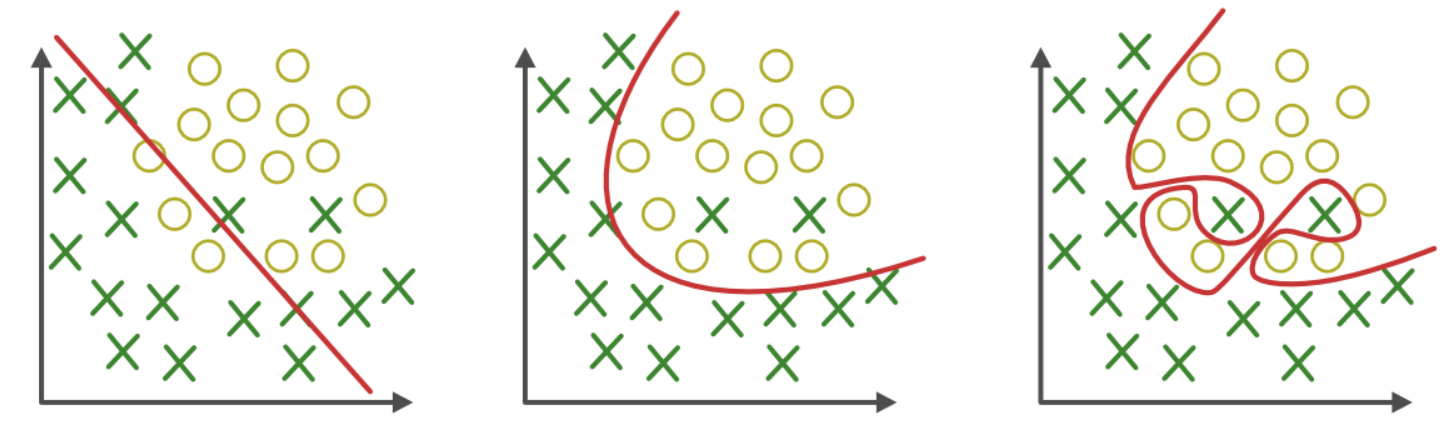

In [27]:
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/overfitting.png")

Write your answer in this block

**Answer:**

The classifier on the right is likely overfitting because its decision boundary is overly complex, capturing noise in the training data rather than the general pattern.

Consider the below scenario :

You have a train validation and test split. Your training accuracy is 100% and validation accuracy is 100%. But your testing accuracy is very poor.

1. Your validation split doesn't contain any data leakage.
2. Your validation and testing split belongs to the same data distribution.
3. You did not train on Validation data. You used appropriate measures to ensure your validation data was properly evaluated.


Give the following scenarios as above, Explain why your testing accuracy could have suffered so badly.

Hint : There's no single unanimous right answer. But you will be graded on your creativity and out of the box thinking.

Write your answer in this block

**Answer:**  

Two reasons why our test accuracy may be poor despite achieving 100% accuracy on both the training and validation sets are:

1. **Overfitting to Training and Validation Data**  
   - The model may have memorized patterns from the training and validation sets instead of learning generalizable features.  

2. **Different Data Preprocessing for the Test Set**  
   - If the test data was preprocessed differently (e.g., different normalization, missing values handled differently), the model may struggle to interpret it correctly.  

## 4.4. Short answer: SVM Regularization (8 pts)

We will work on a new dataset to train a SVM model


We will plot Decision Boundary of a SVM model with different values of regularization `C`.

<Axes: >

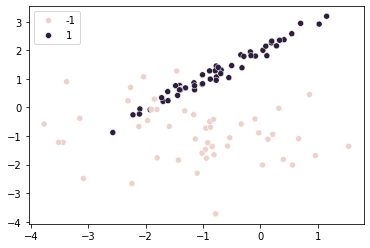

In [28]:
import sklearn
from sklearn.datasets import make_classification, make_circles

import matplotlib.pyplot as plt
from sklearn import svm, datasets


## Make a dummy dataset
X = [None, None, None]
y = [None, None, None]
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# Go from {0, 1} to {-1, 1}
y = [2 * yy - 1 for yy in y]

## plot the dataset
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

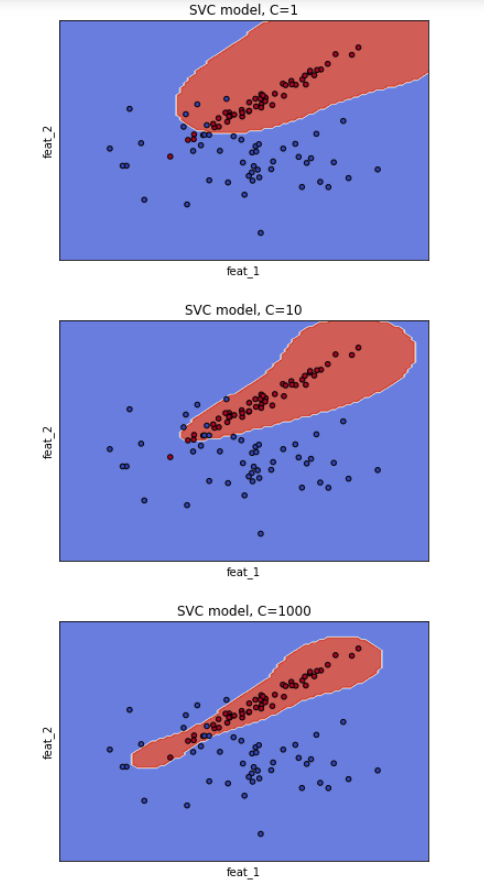

In [29]:
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/pic_for_last_question.png")

### How does `C` affect the boundary? Briefly explain your answer.

Write your answer in this block

**Answer:**

The parameter $C$ in SVMs controls how much the model tries to avoid mistakes. A *small $C$* allows more mistakes but creates a *smoother, more generalized* decision boundary. A *large $C$* tries to *make fewer mistakes*, so the boundary *fits the data more closely*, but this can lead to *overfitting*.  

In summary, higher $C$ results in a more complex, precise boundary but increases the risk of overfitting.


Congrats! You have reached to the end of ps1.